<a href="https://colab.research.google.com/github/zweiner/Machine-Learning-Notebooks/blob/master/stressEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydataset


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=b68a8150887a26629098a37c43b43bf254732fbee00adcd646f97e5bfe24b895
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.preprocessing import StandardScaler



initiated datasets repo at: /root/.pydataset/


In [5]:
df = pd.read_csv("/content/Dataset_HumanStressDetection_PerceptionJournal.csv")

In [6]:
df


,Listener_ID,Listener_sex_0M1F,Listener_age,Stress_Rating,Condition_0B1S,Speaker_ID,Speaker_sex_1F,Speaker_height_cm,Speaker_weight_kg,Speaker_Cortisol,...,vowels_F1,vowels_F2,vowels_F3,vowels_F4,vowels_deltaF,vowels_deltaF_VTL,JitterPC,ShimmerPC,HNR,sdHNR
0,1,1,19,8,0,101,1,162,51,4.708935,...,502.270497,1668.379006,2671.406836,4233.326745,1154.707831,15.155349,0.61849,2.01212,14.8310,7.7844
1,2,1,19,6,0,101,1,162,51,4.708935,...,502.270497,1668.379006,2671.406836,4233.326745,1154.707831,15.155349,0.61849,2.01212,14.8310,7.7844
2,3,1,20,6,0,101,1,162,51,4.708935,...,502.270497,1668.379006,2671.406836,4233.326745,1154.707831,15.155349,0.61849,2.01212,14.8310,7.7844
3,4,1,20,6,0,101,1,162,51,4.708935,...,502.270497,1668.379006,2671.406836,4233.326745,1154.707831,15.155349,0.61849,2.01212,14.8310,7.7844
4,5,1,21,6,0,101,1,162,51,4.708935,...,502.270497,1668.379006,2671.406836,4233.326745,1154.707831,15.155349,0.61849,2.01212,14.8310,7.7844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,46,1,27,6,1,127,1,168,55,8.393177,...,469.229045,1506.287759,2794.553181,4341.249257,1174.990548,14.893737,-0.04105,1.15305,16.4867,6.4977
996,47,0,28,5,1,127,1,168,55,8.393177,...,469.229045,1506.287759,2794.553181,4341.249257,1174.990548,14.893737,-0.04105,1.15305,16.4867,6.4977
997,48,0,28,5,1,127,1,168,55,8.393177,...,469.229045,1506.287759,2794.553181,4341.249257,1174.990548,14.893737,-0.04105,1.15305,16.4867,6.4977
998,49,0,28,3,1,127,1,168,55,8.393177,...,469.229045,1506.287759,2794.553181,4341.249257,1174.990548,14.893737,-0.04105,1.15305,16.4867,6.4977


In [7]:
df.columns

Index(['Listener_ID', 'Listener_sex_0M1F', 'Listener_age', 'Stress_Rating', 'Condition_0B1S',
       'Speaker_ID', 'Speaker_sex_1F', 'Speaker_height_cm', 'Speaker_weight_kg',
       'Speaker_Cortisol', 'Speaker_testosterone', 'dur', 'wmp', 'meanF0', 'minF0', 'maxF0',
       'sdF0', 'num_formants', 'F1', 'F2', 'F3', 'F4', 'deltaF', 'deltaF_VTL', 'vowels_F1',
       'vowels_F2', 'vowels_F3', 'vowels_F4', 'vowels_deltaF', 'vowels_deltaF_VTL', 'JitterPC',
       'ShimmerPC', 'HNR', 'sdHNR'],
      dtype='object')

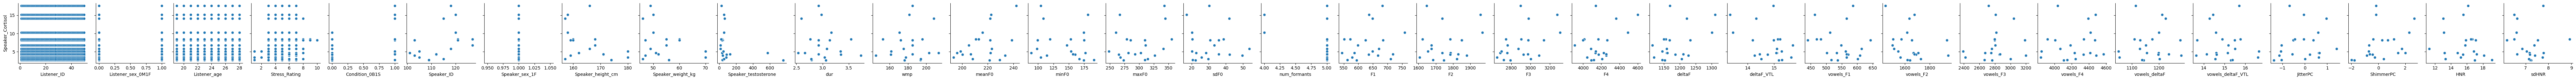

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = df

# my goal here was to understand how all of the variables impacted cortisol
# I made a plot for each variable recorded as a indepedent variable and graphed it along with cortisol as the dependent variable
pp = sns.pairplot(data=data, y_vars=["Speaker_Cortisol"], x_vars=['Listener_ID', 'Listener_sex_0M1F', 'Listener_age', 'Stress_Rating',
       'Condition_0B1S', 'Speaker_ID', 'Speaker_sex_1F', 'Speaker_height_cm',
       'Speaker_weight_kg', 'Speaker_testosterone', 'dur',
       'wmp', 'meanF0', 'minF0', 'maxF0', 'sdF0', 'num_formants', 'F1', 'F2',
       'F3', 'F4', 'deltaF', 'deltaF_VTL', 'vowels_F1', 'vowels_F2',
       'vowels_F3', 'vowels_F4', 'vowels_deltaF', 'vowels_deltaF_VTL',
       'JitterPC', 'ShimmerPC', 'HNR', 'sdHNR'])
plt.show()



Observations about the plots above:



*  Speaker testosterone (the two people with very high testosterone have very low cortisol levels)
*   Duration (small duration seems correlated with stress)
* wmp loosely resembles a normal distribution
* meanF0 has a weak, positive correlation with cortisol levels
* 100 and 175 Hz seem to be the most popular min F0
* F1, F2, and F3 look very similar to each other with F4 looking slightly more different
* F1, F2, F3, and F4 have a high concentration of data in the lower left corner
* deltaF_VTL refers to the change in frequency normalized by vocal tract length, this data appears skewed left
* vowels_F1 lies between 500-600 Hz
*vowels_F2 appears skewed right
*vowels_F3 appears betwen 2600 and 3000 Hz
* vowels_F4 resembles a bimodal distribution
* vowels_deltaF and vowels_deltaF_VTL seem like mirror images of eachother
* Jitter PC resembles ShimmerPC
* sdHNR vs HNR --> standard harmonic to noise ratio vs harmonic to noise ratio
* Calculation: sdHNR is obtained by applying a smoothing function (such as moving average or median filtering) to the HNR values over a specific time window.
Units: sdHNR is also expressed in decibels (dB).


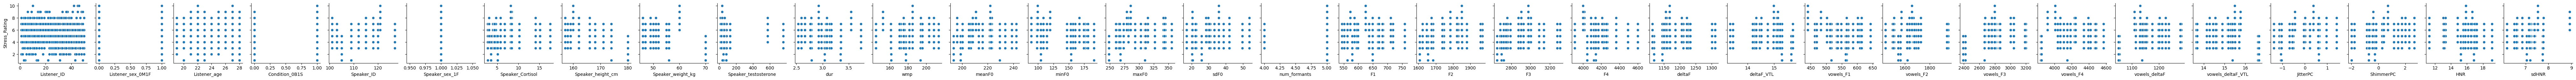

In [9]:
pp = sns.pairplot(data=data, y_vars=["Stress_Rating"], x_vars=['Listener_ID', 'Listener_sex_0M1F', 'Listener_age',
       'Condition_0B1S', 'Speaker_ID', 'Speaker_sex_1F', "Speaker_Cortisol", 'Speaker_height_cm',
       'Speaker_weight_kg', 'Speaker_testosterone', 'dur',
       'wmp', 'meanF0', 'minF0', 'maxF0', 'sdF0', 'num_formants', 'F1', 'F2',
       'F3', 'F4', 'deltaF', 'deltaF_VTL', 'vowels_F1', 'vowels_F2',
       'vowels_F3', 'vowels_F4', 'vowels_deltaF', 'vowels_deltaF_VTL',
       'JitterPC', 'ShimmerPC', 'HNR', 'sdHNR'])
plt.show()

These plots compare all of the variables from the study but with the dependent variable as stress rating this time. It appears as though the speaker stress rating has less correlation and a more variability for each value on the x-axis.

* wmp has a cluster of values around
* Interestingly, min F0 on this set of graphs has a gap between 125 and 150 Hz which is also present in the set of graphs comparing cortisol.
*  

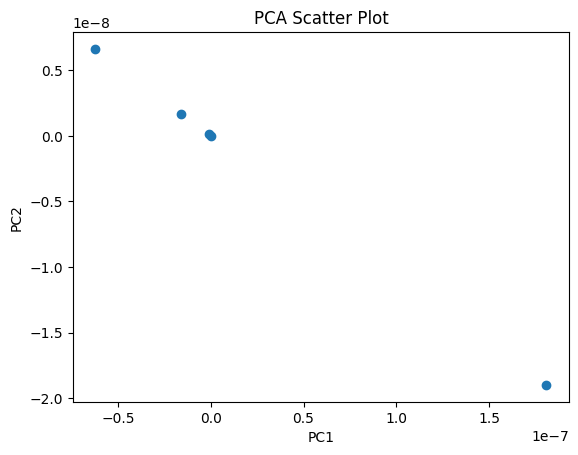

[[-1.20712619e-09  1.29771870e-10 -3.78804233e-10 -5.42850545e-04
  -1.68833961e-04  1.11191939e-04 -1.20408913e-28  1.45241800e-02
   1.47173508e-02 -3.11802700e-03  8.71287884e-02 -7.63083669e-05
   3.19528224e-03 -1.62404122e-02 -2.98250686e-02 -1.34580930e-02
  -5.88069279e-03  3.89980959e-04 -9.11325880e-02 -2.31995712e-01
  -4.37637187e-01 -3.41208024e-01 -1.27708615e-01  1.55212450e-03
  -2.69359190e-02 -2.48875068e-01 -4.65678915e-01 -5.45461183e-01
  -1.64766285e-01  2.12911848e-03 -1.35892580e-04 -8.54671111e-04
   3.51000916e-04  9.46639854e-04]
 [-1.34506575e-10  1.44076879e-11 -4.21188717e-11 -1.75462459e-05
  -7.18042204e-04 -1.80041889e-02  2.61881727e-26  3.75179437e-03
  -3.79944990e-03 -7.89094479e-03  9.55965228e-01 -2.39715144e-04
   1.45462397e-02 -9.98978400e-03  1.13823270e-02 -3.71637948e-02
  -7.26382882e-03  1.76009068e-04 -5.77461972e-02  6.42834540e-02
  -1.45991576e-01 -2.03338105e-02 -1.75521525e-02  1.85736940e-04
  -1.87650638e-02  1.56761319e-01  2.6139

In [ ]:
#this is my attempt to use PCA using information from YouTube and from Microsoft Copliot

from sklearn.decomposition import PCA


# Initialize PCA with desired number of components (aribtrarily selected)
pca = PCA(n_components=5)

# Fit PCA to your data
pca.fit(df)

# Access the principal components
components = pca.components_


# Assuming 'principal_components' contains your transformed data
plt.scatter(components[:, 0], components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

print(components)
print('gap')
print(components[:,0])
print("gap")
print(pca)



I'm having a difficult time figuring out how to decipher these numbers and what exactly this plot means even if it is useful.

In [ ]:
#this is my attempt to break down the data to understand it by printing out the lists
# it is my understanding that the lists make up the points that describe the vectors of PC1,2,3, etc.
PC1 = components[:,0]
PC2 = components[:,1]
PC3 = components[:,2]
PC4 = components[:,3]
PC5 = components[:,4]

print(PC1)
print(PC2)
print(PC3)
print(PC4)
print(PC5)

[-1.20712619e-09 -1.34506575e-10 -1.58367147e-08 -6.22234739e-08
  1.80942512e-07]
[ 1.29771870e-10  1.44076879e-11  1.69253479e-09  6.62855207e-09
 -1.89813833e-08]
[-3.78804233e-10 -4.21188717e-11 -4.95248629e-09 -1.94216119e-08
  5.59711441e-08]
[-5.42850545e-04 -1.75462459e-05 -1.43156643e-03 -3.89782525e-03
  4.58003285e-03]
[-0.00016883 -0.00071804  0.00021724  0.00152907 -0.00048395]


In [ ]:
# I then tried to turn the dataframe into an array to try PCA code for arrays on the data

numpy_array = df[["Speaker_Cortisol", 'Speaker_testosterone', 'dur',
       'wmp', 'meanF0', 'minF0', 'maxF0', 'sdF0', 'num_formants', 'F1', 'F2',
       'F3', 'F4', 'deltaF', 'deltaF_VTL', 'vowels_F1', 'vowels_F2',
       'vowels_F3', 'vowels_F4', 'vowels_deltaF', 'vowels_deltaF_VTL',
       'JitterPC', 'ShimmerPC', 'HNR', 'sdHNR'
]].to_numpy()

print(numpy_array)


[[  4.70893459 572.8635429    2.66042532 ...   2.01212     14.831
    7.7844    ]
 [  4.70893459 572.8635429    2.66042532 ...   2.01212     14.831
    7.7844    ]
 [  4.70893459 572.8635429    2.66042532 ...   2.01212     14.831
    7.7844    ]
 ...
 [  8.39317693  23.14900877   2.76116766 ...   1.15305     16.4867
    6.4977    ]
 [  8.39317693  23.14900877   2.76116766 ...   1.15305     16.4867
    6.4977    ]
 [  8.39317693  23.14900877   2.76116766 ...   1.15305     16.4867
    6.4977    ]]


In [ ]:
# I then tried to change the shape of the array containing the df so that I could run PCA on it
numpy_array.shape
numpy_array.data[0].reshape(8,8)

NotImplementedError: multi-dimensional sub-views are not implemented

In [ ]:
# however I couldn't run the code used in the video
# so I tried understanding the array better by trying to understand its components
np.unique(df['Speaker_Cortisol'])

array([ 2.66896471,  2.74902483,  3.03998867,  3.49233655,  3.99724446,
        4.26223453,  4.34889226,  4.6783171 ,  4.70893459,  5.12615615,
        5.7765602 ,  6.74436909,  8.17243958,  8.17724315,  8.39317693,
        8.40844177, 10.23959831, 14.07953201, 15.1866007 , 17.5555252 ])

In [ ]:
# however the jupyter notebook used in the youtube video I was looking at had different data
np.unique(numpy_array.target)

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [ ]:
df.columns

Index(['Listener_ID', 'Listener_sex_0M1F', 'Listener_age', 'Stress_Rating', 'Condition_0B1S',
       'Speaker_ID', 'Speaker_sex_1F', 'Speaker_height_cm', 'Speaker_weight_kg',
       'Speaker_Cortisol', 'Speaker_testosterone', 'dur', 'wmp', 'meanF0', 'minF0', 'maxF0',
       'sdF0', 'num_formants', 'F1', 'F2', 'F3', 'F4', 'deltaF', 'deltaF_VTL', 'vowels_F1',
       'vowels_F2', 'vowels_F3', 'vowels_F4', 'vowels_deltaF', 'vowels_deltaF_VTL', 'JitterPC',
       'ShimmerPC', 'HNR', 'sdHNR'],
      dtype='object')

In [ ]:
df = df.dropna()
# this drops missing values
df = df.drop(columns=['Listener_ID','Listener_sex_0M1F','Listener_age','Stress_Rating', 'Condition_0B1S', 'Speaker_ID', 'Speaker_sex_1F','Speaker_height_cm', 'Speaker_weight_kg','Speaker_testosterone'])

In [ ]:
scaler = StandardScaler()
# this code creates an instance of the Standard Scalar class
# you want to scale your data s.t. each feature (variable) has a mean of zero
# and standard deviation of 1 so you can ensure that each feature contributes equally
df_scaled = scaler.fit_transform(df)
# now that we created a class, we are going to use it
df_scaled= pd.DataFrame(df_scaled, columns=df.columns)
# we need to turn the scaled data back into a data frame (columns = df.columns) keeps column names
df.describe()
# this shows the imbalance in means which will mean that some features matter more




,Speaker_Cortisol,dur,wmp,meanF0,minF0,maxF0,sdF0,num_formants,F1,F2,...,vowels_F1,vowels_F2,vowels_F3,vowels_F4,vowels_deltaF,vowels_deltaF_VTL,JitterPC,ShimmerPC,HNR,sdHNR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.090279,3.011024,181.041893,216.288450,142.379215,298.836436,30.977545,4.90000,633.722193,1764.922400,...,544.558371,1642.972747,2805.564081,4227.747109,1168.941114,15.013676,-0.123878,0.235666,15.569150,7.172300
std,4.183261,0.298594,17.297588,13.563404,32.816889,30.997386,10.118086,0.30015,58.489763,102.926370,...,53.231891,126.041009,197.210932,217.794897,62.246601,0.807457,0.781665,1.269744,1.904905,0.604830
min,2.668965,2.531665,144.884549,193.274600,88.808300,248.082900,17.024200,4.00000,543.468972,1605.729158,...,441.083091,1444.347071,2391.344819,3842.582753,1050.319906,13.644390,-1.382560,-1.976370,11.292500,6.186100
25%,4.195987,2.789112,171.734649,206.511800,107.622950,271.931375,21.914425,5.00000,585.008061,1674.461599,...,509.569117,1559.426041,2742.075198,4058.669703,1129.651558,14.525344,-0.778072,-0.657262,14.454175,6.629850
50%,5.451358,2.949684,183.086896,218.722100,153.406600,297.603285,30.011150,5.00000,635.667852,1765.046243,...,555.554167,1638.094843,2794.953588,4239.237361,1164.849189,15.024543,-0.043935,-0.166215,15.805800,7.173200
75%,8.396993,3.144436,193.610161,222.697425,174.272825,317.504725,36.560750,5.00000,673.411541,1834.594900,...,575.013505,1681.035457,2860.349085,4415.215138,1204.803371,15.491504,0.603857,1.229662,16.880575,7.440775
max,17.555525,3.727106,213.298326,242.198000,190.767400,355.063300,53.607500,5.00000,758.104165,1969.125634,...,643.226366,1950.563695,3200.709635,4571.617365,1282.578442,16.661590,1.425910,2.672000,19.138800,8.932600


Here's an example

Original data:
[[1 2]
 [3 4]
 [5 6]
 [7 8]]

Scaled data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


In [ ]:
df_scaled.describe()
# notice how the mean and standard deviation have essentially become 1 and zero

,Speaker_Cortisol,dur,wmp,meanF0,minF0,maxF0,sdF0,num_formants,F1,F2,...,vowels_F1,vowels_F2,vowels_F3,vowels_F4,vowels_deltaF,vowels_deltaF_VTL,JitterPC,ShimmerPC,HNR,sdHNR
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03
mean,3.410605e-16,-5.826450e-16,7.389644e-16,-9.947598e-16,-5.115908e-16,-8.242296e-16,-5.329071e-16,-1.193712e-15,6.252776e-16,-3.311129e-15,...,1.477929e-15,1.563194e-15,-2.302158e-15,2.700062e-15,-9.308110e-16,1.179501e-15,2.842171e-17,0.000000,1.477929e-15,3.055334e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00,1.000500e+00
min,-1.057435e+00,-1.606188e+00,-2.091357e+00,-1.697610e+00,-1.633236e+00,-1.638168e+00,-1.379740e+00,-3.000000e+00,-1.543832e+00,-1.547445e+00,...,-1.944831e+00,-1.576670e+00,-2.101438e+00,-1.769358e+00,-1.906619e+00,-1.696650e+00,-1.611064e+00,-1.742983,-2.246196e+00,-1.631356e+00
25%,-6.922208e-01,-7.435603e-01,-5.383353e-01,-7.211716e-01,-1.059627e+00,-8.684127e-01,-8.961828e-01,3.333333e-01,-8.332827e-01,-8.793283e-01,...,-6.576276e-01,-6.631850e-01,-3.220950e-01,-7.767033e-01,-6.315078e-01,-6.050796e-01,-8.373435e-01,-0.703587,-5.856107e-01,-8.973118e-01
50%,-3.919767e-01,-2.055298e-01,1.182839e-01,1.795175e-01,3.361959e-01,-3.980231e-02,-9.555943e-02,3.333333e-01,3.328159e-02,1.203813e-03,...,2.066674e-01,-3.872030e-02,-5.382968e-02,5.278361e-02,-6.577020e-02,1.346532e-02,1.023239e-01,-0.316664,1.242941e-01,1.488765e-03
75%,3.125236e-01,4.470257e-01,7.269543e-01,4.727561e-01,9.723520e-01,6.025550e-01,5.520806e-01,3.333333e-01,6.789087e-01,6.772546e-01,...,5.724082e-01,3.021378e-01,2.779380e-01,8.611856e-01,5.764203e-01,5.920661e-01,9.314731e-01,0.783224,6.887908e-01,4.441069e-01
max,2.502948e+00,2.399380e+00,1.865727e+00,1.911210e+00,1.475228e+00,1.814830e+00,2.237704e+00,3.333333e-01,2.127624e+00,1.984967e+00,...,1.854478e+00,2.441625e+00,2.004672e+00,1.579662e+00,1.826512e+00,2.041892e+00,1.983668e+00,1.919719,1.874863e+00,2.911859e+00


In [ ]:
# This shows how much the data has change since it has been scaled
df_scaled

,Speaker_Cortisol,dur,wmp,meanF0,minF0,maxF0,sdF0,num_formants,F1,F2,...,vowels_F1,vowels_F2,vowels_F3,vowels_F4,vowels_deltaF,vowels_deltaF_VTL,JitterPC,ShimmerPC,HNR,sdHNR
0,-0.569540,-1.174751,1.268625,-1.490110,-1.633236,-0.553986,-0.255200,0.333333,-0.799967,0.196338,...,-0.794806,0.201672,-0.680613,0.025632,-0.228774,0.175544,0.950202,1.399764,-0.387693,1.012526
1,-0.569540,-1.174751,1.268625,-1.490110,-1.633236,-0.553986,-0.255200,0.333333,-0.799967,0.196338,...,-0.794806,0.201672,-0.680613,0.025632,-0.228774,0.175544,0.950202,1.399764,-0.387693,1.012526
2,-0.569540,-1.174751,1.268625,-1.490110,-1.633236,-0.553986,-0.255200,0.333333,-0.799967,0.196338,...,-0.794806,0.201672,-0.680613,0.025632,-0.228774,0.175544,0.950202,1.399764,-0.387693,1.012526
3,-0.569540,-1.174751,1.268625,-1.490110,-1.633236,-0.553986,-0.255200,0.333333,-0.799967,0.196338,...,-0.794806,0.201672,-0.680613,0.025632,-0.228774,0.175544,0.950202,1.399764,-0.387693,1.012526
4,-0.569540,-1.174751,1.268625,-1.490110,-1.633236,-0.553986,-0.255200,0.333333,-0.799967,0.196338,...,-0.794806,0.201672,-0.680613,0.025632,-0.228774,0.175544,0.950202,1.399764,-0.387693,1.012526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.311611,-0.837193,0.840280,-0.249476,0.334251,1.814830,0.760342,0.333333,-1.411625,-1.373574,...,-1.415825,-1.084991,-0.055861,0.521403,0.097234,-0.148613,0.106017,0.722857,0.481919,-1.115912
996,0.311611,-0.837193,0.840280,-0.249476,0.334251,1.814830,0.760342,0.333333,-1.411625,-1.373574,...,-1.415825,-1.084991,-0.055861,0.521403,0.097234,-0.148613,0.106017,0.722857,0.481919,-1.115912
997,0.311611,-0.837193,0.840280,-0.249476,0.334251,1.814830,0.760342,0.333333,-1.411625,-1.373574,...,-1.415825,-1.084991,-0.055861,0.521403,0.097234,-0.148613,0.106017,0.722857,0.481919,-1.115912
998,0.311611,-0.837193,0.840280,-0.249476,0.334251,1.814830,0.760342,0.333333,-1.411625,-1.373574,...,-1.415825,-1.084991,-0.055861,0.521403,0.097234,-0.148613,0.106017,0.722857,0.481919,-1.115912


In [ ]:
# this is where the actual PCA takes place
pca_5 = PCA(n_components=5)
# how many principle components do we want (stored as an object pca_5)
X_pca_5 = pca_5.fit_transform(df_scaled)
# making x variable pca 5 components and it is the fit_transform that does the PCA
X_pca_5
# creates an array that is 5 components wide
# Note that the first column is the 0th column due to python's general indexing

array([[-1.66938415,  2.09335307,  0.65130889,  0.12423813, -1.61273679],
       [-1.66938415,  2.09335307,  0.65130889,  0.12423813, -1.61273679],
       [-1.66938415,  2.09335307,  0.65130889,  0.12423813, -1.61273679],
       ...,
       [-1.20354078,  2.00186866, -0.9658101 ,  1.90230757,  0.95200065],
       [-1.20354078,  2.00186866, -0.9658101 ,  1.90230757,  0.95200065],
       [-1.20354078,  2.00186866, -0.9658101 ,  1.90230757,  0.95200065]])

In [ ]:
pca_5.explained_variance_ratio_
# this shows the amount of variance explained by each component

array([0.36920322, 0.16109019, 0.14439973, 0.09794836, 0.06991665])

In [ ]:

pca_5.explained_variance_ratio_.sum()
# this shows the total variance explained--> this is to say that we can explain
# 84% of the data only using 5 different components

0.8425581486599328

I believe that PC1 of 36% is the one that contians the jitter shimmer and HNR, which demonstrates how heavy these variables influence the data

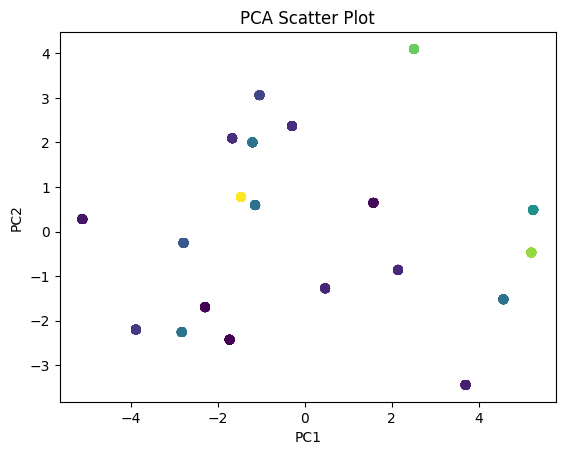

In [ ]:
plt.scatter(X_pca_5[:, 0], X_pca_5[:, 1], c=df_scaled.Speaker_Cortisol)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

The video said that I should see more seperation between the colors. That is, I should be able to see that in cortisol levels can be determined by the other variables. I'm still a little shaky in my understandin of why this is though...